# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 2</span>

## 02.1

Ho calcolato il valore del seguente integrale: $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1\ , $$ tramite un'integrazione Monte Carlo e campionando due differenti distribuzioni.

Dapprima ho campionato una distribuzione uniforme nell'intervallo $[0, 1]$. 

Ho poi utilizzato *Importance Sampling*. Questo metodo consiste nel riscrivere l'integrale $\int g(x) dx$ aggiungendo una nuova distribuzione di probabilità $p(x)$ nel seguente modo: $$\int \biggl[ \frac{g(x)}{p(x)}\biggr]p(x)dx\ , $$ con $p(x)$ normalizzata e positiva in tutto l'intervallo di integrazione.

Ho scelto di scrivere la distribuzione $p(x)$ come lo sviluppo di Taylor al terzo ordine della funzione $g(x)=\frac{\pi}{2}\cos(\pi x/2)$, diviso per la normalizzazione. Ho ottenuto $$p(x) = (1 - \frac{\pi^2 x^2}{8} + \frac{\pi^4 x^4}{384})\big/(1 - \frac{\pi^2}{8} + \frac{\pi^4}{384})\ . $$

È necessario sviluppare fino al terzo ordine poichè in questo modo la densità di probabilità che ho scelto è positiva nell'intervallo $[0,1]$. Per campionare questa distribuzione ho usato una tecnica di *reject*. Ho generato un numero distribuito uniformemente in $[0,1]$ che costituisce la $x$ campionata proposta nell'intervallo di interesse dell'integrale. Si accetta questo valore se, estraendo un ulteriore numero $r$ casuale in $[0,1]$, si ha $r < \frac{p(x)}{p_{max}}$ con $p_{max} = p(0)$ per lo sviluppo che ho scelto.

Ho effettuato un numero di misure $M=10^5$ con $N=100$ blocchi e riporto di seguito i risultati ottenuti. In entrambi i casi il valore dell'integrale campionato rispetto a quello analitico è accettabile entro l'errore.

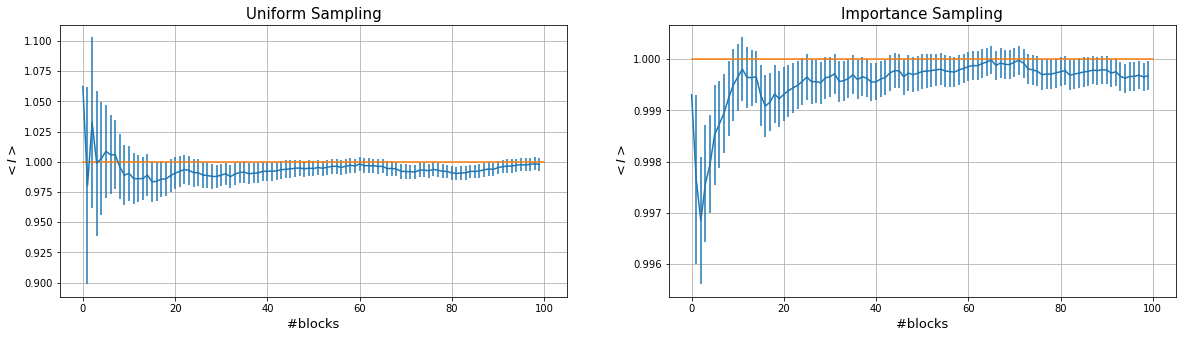

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from scipy import optimize

M=100000
N=100
x=np.arange(N)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

(sum_prog, err_prog)=np.loadtxt('02.1/results02.1.txt', unpack=True, usecols=(0, 1))
axs[0].errorbar(x,sum_prog,yerr=err_prog)
axs[0].set_title('Uniform Sampling', fontsize=15)

(sum_prog, err_prog)=np.loadtxt('02.1/results02.1.txt', unpack=True, usecols=(2, 3))
axs[1].errorbar(x,sum_prog,yerr=err_prog)
axs[1].set_title('Importance Sampling', fontsize=15)

for ax in axs.flat:
    ax.set_xlabel('#blocks', fontsize=13)
    ax.set_ylabel('$<I>$', fontsize=13)
    ax.plot([0, N], [1, 1])
    ax.grid()

## 02.2

In questo esercizio ho implementato la simulazione di due *Random Walks* (*RW*) in uno spazio *3D* :

1) il primo *RW* avviene in un reticolo cubico di lato $a=1$. Ad ogni mossa il passo viene scelto nella direzione *x, y, z,* in modo casuale e ha la stessa probabilità di essere lungo $+a (+1)$ o $-a (-1)$.

2) il secondo *RW* avviene nel continuo e la posizione viene descritta attraverso le coordinate sferiche. Il passo è sempre di lunghezza $a=1$ e può avvenire in una direzione casuale campionando uniformemente l'angolo solido descritto da $\theta \in [0, \pi]$ e $\phi \in [0, 2\pi]$. Ho campionato l'angolo $\phi$ con una distribuzione uniforme in $[0, 2\pi]$ e ho utilizzato per $\theta$ la seguente equazione $arcos(1-2r)$ con $r$ numero distribuito in $[0, 1]$ uniformemente. Anche in questo caso una volta scelta una direzione il passo ha la stessa probabilità di essere positivo o negativo.

Ho fatto un *RW* di $100$ passi e alla fine di ogni passo ho calcolato la quantità $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, che corrisponde alla radice della distanza quadratica media fra il punto a cui ci si trova ad ogni passo e il punto di partenza del *RW*, che ho considerato essere l'origine. Siccome il *RW* è un processo diffusivo questa quantità è una funzione $f(N)=k\sqrt{N}$ in cui N indica il numero degli step.

Ho effettuato $M=10^4$ volte il *RW* in ciascuno dei due casi e ho considerato $N=100$ blocchi per poter mediare il valore della distanza dal centro. Ho riportato in un grafico la quantità $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ in funzione del numero di step e ho fittato i dati con la funzione $f(N)$.

3D lattice fit parameter: k = [1.00294711]
Continuum fit parameter: k = [0.9946739]


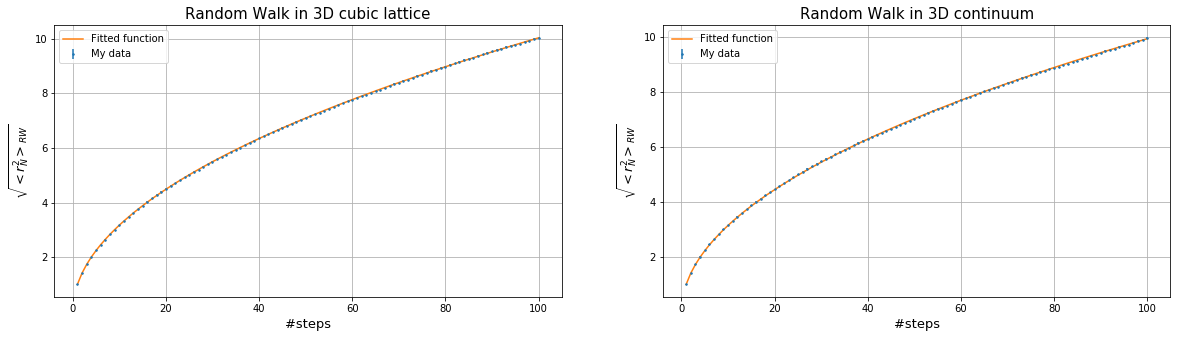

In [2]:
def test_func(x, a):
    return a * np.sqrt(x)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

(step, R, errR)=np.loadtxt('02.2/results02.2.txt', unpack=True, usecols=(0, 1, 2))
params = optimize.curve_fit(test_func, step, R)
axs[0].set_title('Random Walk in 3D cubic lattice', fontsize=15)
axs[0].errorbar(step, R, yerr=errR, linestyle = " ", marker=".", label ='My data', markersize=3)
axs[0].plot(step, test_func(step, params[0]), label='Fitted function')
print('3D lattice fit parameter: k =', params[0])

(step, R, errR)=np.loadtxt('02.2/results02.2_cont.txt', unpack=True, usecols=(0, 1, 2))
params = optimize.curve_fit(test_func, step, R)
axs[1].set_title('Random Walk in 3D continuum', fontsize=15)
axs[1].errorbar(step, R, yerr=errR, linestyle = " ", marker=".", label ='My data', markersize=3)
axs[1].plot(step, test_func(step, params[0]), label='Fitted function')
print('Continuum fit parameter: k =', params[0])

for ax in axs.flat:
    ax.set_xlabel('#steps', fontsize=13)
    ax.set_ylabel('$\sqrt{<r_N^2>_{RW}}$', fontsize=13)
    ax.legend(loc='best', fontsize='medium')
    ax.grid(True)

Il risultato ottenuto è compatibile con un comportamento diffusivo. Inoltre il valore della costante $k$ che ho estrapolato dal fit è $1$ e corrisponde con quello atteso da un *RW* di questo tipo, poichè corrisponde al modulo della lunghezza del passo effettuato ($a=1$).